### PyTorch Custom Datasets

Getting our own data into PyTorch

In [2]:
# Importing dependencies and device agnostic code
import torch
from torch import nn

torch.__version__

'2.4.1'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
!nvidia-smi

Thu May 15 07:04:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P8              1W /  130W |    1174MiB /   8188MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# FoodVision Mini
'''
Our dataset is a subset of the Food101 dataset.

Our datasest starts with 3 classes of food and only 75 training / 25 testing images.
'''
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("Datasets")
image_path = data_path / "pizza_steak_sushi."

if image_path.is_dir():
    print(f'{image_path} already exists!')
else:
    print(f'{image_path} doesn`t exist creating one')
    image_path.mkdir(parents=True, exist_ok=True)

# Downloading
with open(data_path / 'pizza_steak_sushi.zip', "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading food imaged data!")
    f.write(request.content)

# Unzipping
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data!")
    zip_ref.extractall(image_path)

Datasets\pizza_steak_sushi. already exists!
Unzipping pizza, steak and sushi data!


## Data Preparation and Exploration

In [6]:
import os
def walk_through_dir(dir_path):
    """ 
    Walks through dir_path returning its contents
    """

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Datasets\pizza_steak_sushi.'
There are 3 directories and 0 images in 'Datasets\pizza_steak_sushi.\test'
There are 0 directories and 25 images in 'Datasets\pizza_steak_sushi.\test\pizza'
There are 0 directories and 19 images in 'Datasets\pizza_steak_sushi.\test\steak'
There are 0 directories and 31 images in 'Datasets\pizza_steak_sushi.\test\sushi'
There are 3 directories and 0 images in 'Datasets\pizza_steak_sushi.\train'
There are 0 directories and 78 images in 'Datasets\pizza_steak_sushi.\train\pizza'
There are 0 directories and 75 images in 'Datasets\pizza_steak_sushi.\train\steak'
There are 0 directories and 72 images in 'Datasets\pizza_steak_sushi.\train\sushi'


In [8]:
# Setup training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir # Built for prebuilt data loading in pytorch

(WindowsPath('Datasets/pizza_steak_sushi./train'),
 WindowsPath('Datasets/pizza_steak_sushi./test'))

### Visualizing an imge

1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class using `pathlib.Path.parent.stem`
4. Opening images with Python's PIL (Python Imaging Library)
5. Show image and print metadata

In [9]:
# Visualizing a random image
import random
from PIL import Image

torch.manual_seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # Lists all images with .jpg extensions

image_path_list

[WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1152100.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1503858.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1687143.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1925494.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/194643.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/195160.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2003290.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2019408.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2111981.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2124579.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2218680.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2236338.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2508636.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2871261.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/piz

Datasets\pizza_steak_sushi.\test\pizza\2111981.jpg
Random Image Path: Datasets\pizza_steak_sushi.\test\pizza\2111981.jpg
Image Class: pizza
Image Height: 512
Image Width: 512


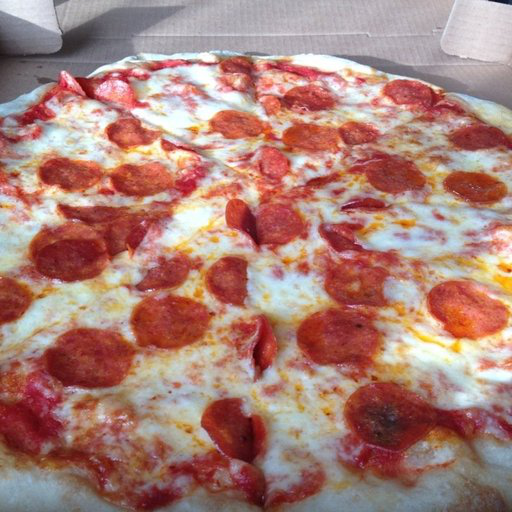

In [10]:
torch.manual_seed(42)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class
image_class = random_image_path.parent.stem
image_class

# 4. Open image
img = Image.open(random_image_path)

# 5. Print Metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

Text(0.5, 1.0, 'Image Class: pizza | Image Shape: (512, 512, 3): [ht, wt, color_channels]')

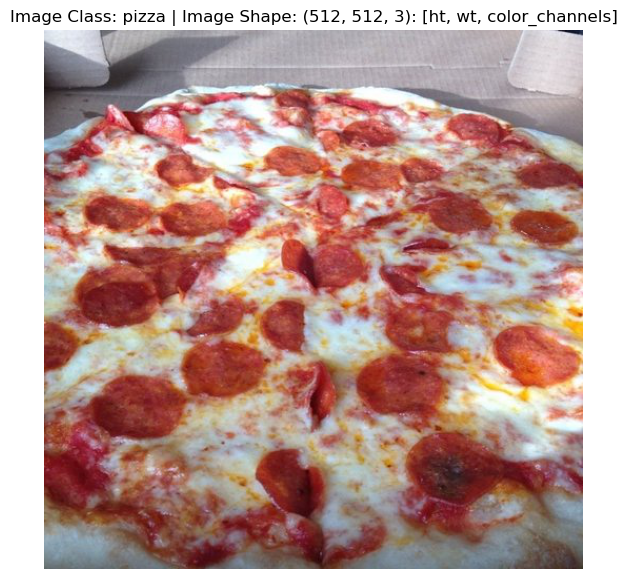

In [11]:
# Visualize using matplotlib
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis('off')
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape}: [ht, wt, color_channels]")

In [12]:
img_as_array

array([[[218, 224, 236],
        [220, 226, 238],
        [223, 229, 241],
        ...,
        [ 38,  49,  77],
        [ 45,  56,  84],
        [ 38,  49,  77]],

       [[209, 215, 227],
        [212, 218, 230],
        [216, 222, 234],
        ...,
        [ 35,  45,  72],
        [ 44,  54,  81],
        [ 46,  58,  84]],

       [[205, 212, 222],
        [208, 215, 225],
        [213, 220, 230],
        ...,
        [ 36,  46,  71],
        [ 36,  46,  71],
        [ 42,  52,  77]],

       ...,

       [[105, 115, 114],
        [103, 113, 114],
        [104, 114, 115],
        ...,
        [ 69,  61,  50],
        [ 68,  60,  49],
        [ 64,  58,  46]],

       [[100, 110, 109],
        [ 99, 109, 110],
        [100, 110, 111],
        ...,
        [ 64,  56,  45],
        [ 62,  56,  44],
        [ 60,  54,  42]],

       [[ 99, 109, 108],
        [ 97, 107, 106],
        [ 98, 108, 109],
        ...,
        [ 61,  53,  42],
        [ 60,  54,  42],
        [ 60,  54,  40]]

In [13]:
# Converting all images to tensors then datasets then dataloader
# Transform parameter

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.8549, 0.8902, 0.8980,  ..., 0.7725, 0.6275, 0.4941],
         [0.6980, 0.8118, 0.8745,  ..., 0.8784, 0.8588, 0.8353],
         [0.4902, 0.5529, 0.6471,  ..., 0.8784, 0.8588, 0.8392],
         ...,
         [0.5294, 0.5216, 0.5255,  ..., 0.3765, 0.3804, 0.3922],
         [0.4784, 0.4941, 0.4863,  ..., 0.3333, 0.3098, 0.3373],
         [0.4314, 0.4353, 0.4314,  ..., 0.2980, 0.2745, 0.2784]],

        [[0.8824, 0.9176, 0.9137,  ..., 0.7647, 0.6314, 0.5098],
         [0.7216, 0.8353, 0.8941,  ..., 0.8588, 0.8353, 0.8118],
         [0.4980, 0.5647, 0.6627,  ..., 0.8510, 0.8314, 0.8118],
         ...,
         [0.6118, 0.6118, 0.6078,  ..., 0.3020, 0.3451, 0.4000],
         [0.5490, 0.5686, 0.5569,  ..., 0.2667, 0.2471, 0.3059],
         [0.4745, 0.4784, 0.4784,  ..., 0.2314, 0.2078, 0.2235]],

        [[0.9176, 0.9451, 0.9451,  ..., 0.8000, 0.6745, 0.5725],
         [0.7647, 0.8745, 0.9255,  ..., 0.8784, 0.8549, 0.8431],
         [0.5490, 0.6235, 0.7098,  ..., 0.8706, 0.8510, 0.

In [15]:
data_transform(img).shape # From HWC to CHW when changed to Tensors

torch.Size([3, 64, 64])

In [16]:
data_transform(img).dtype

torch.float32

'\nSize is reduced so pictures are more pixelated, simpler\n\nEasier processing but might cause some loss in image details\n'

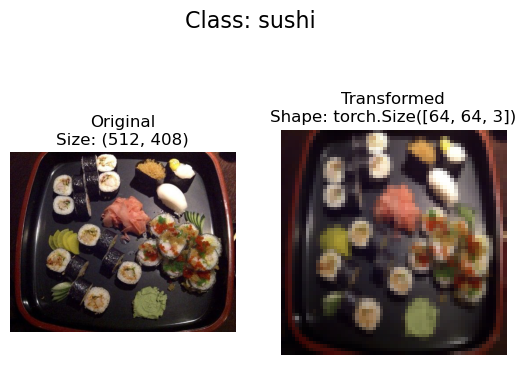

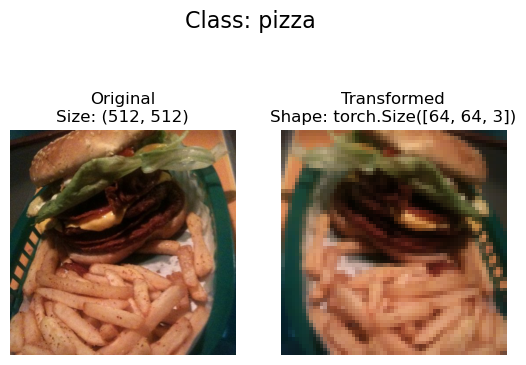

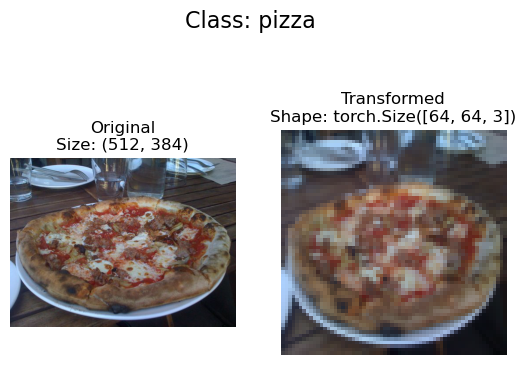

In [17]:
# Visualizing the transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2) 
            # Figure of size (1,2) -> [<Axes0>, <Axes1>], ax is to represent Axes0 and Axes1
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) 
            # Tensor: (C, H, W) but matplotlib requires (H, W, C), so permutation is done
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

"""
Size is reduced so pictures are more pixelated, simpler

Easier processing but might cause some loss in image details
"""

In [18]:
# Option 1: Loading image data using `torchvision.datasets.ImageFolder`
# For cases when data is organized in standard PyTorch format

from torchvision import datasets

# Converts entire image dataset into tensors
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # Transform for data
                                  target_transform=None) # Transform for label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Datasets\pizza_steak_sushi.\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Datasets\pizza_steak_sushi.\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
# Get class names
class_names = train_data.classes
class_names # A list

['pizza', 'steak', 'sushi']

In [21]:
class_dict = train_data.class_to_idx # Converts to dictionary
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
len(train_data), len(test_data)

(225, 75)

In [27]:
train_data.targets[0] # First is Pizza

0

In [ ]:
train_data.samples[0] # A Pizza as well

('Datasets\\pizza_steak_sushi.\\train\\pizza\\1008844.jpg', 0)

In [31]:
# Index on the train_data Dataset to get a sisngle image and label
train_data[0] # [[[Image], Label]] Format

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [34]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [35]:
class_names[label]

'pizza'

In [38]:
# Properties of Image and Label
print(f"Image Tensor: {img}\nImage Shape: {img.shape}\nImage Datatype: {img.dtype}")
print(f"Image Label: {label}\nLabel Class: {class_names[label]}\nLabel Datatype: {type(label)}")

Image Tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [40]:
# Rearrange the dimensions 
img_permute = img.permute(1,2,0)

print(f"Original Shape: {img.shape}: C * H * W")
print(f"Permuted Shape: {img_permute.shape}: H * W * C")    

Original Shape: torch.Size([3, 64, 64]): C * H * W
Permuted Shape: torch.Size([64, 64, 3]): H * W * C


Text(0.5, 1.0, 'pizza')

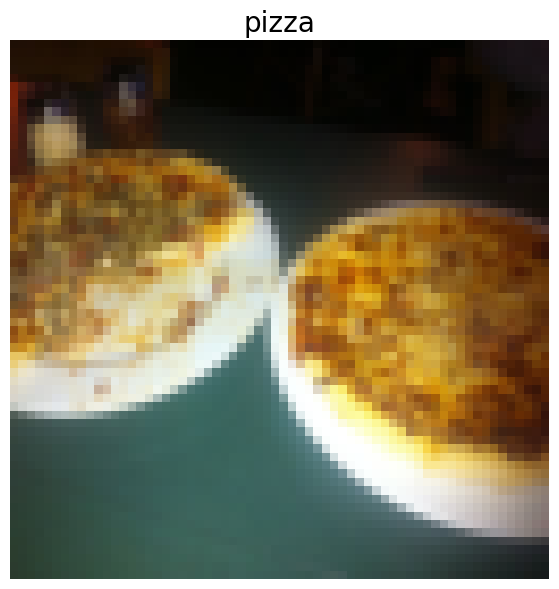

In [42]:
# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=20)

# Pixelated Pizza 64 by 64 Pixels only

In [56]:
# Assigning CPU count for data loading
import os
os.cpu_count()

32

In [57]:
# Creating a Train/Test DataLoader
# DataLoader helps us turn the dataset into iterables of specific batch sizes
# So the model can see the images in batches

from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

len(train_dataloader), len(test_dataloader) # When Batch Size is 1

(8, 3)

In [54]:
# Batch Size 32
len(train_dataloader), len(test_dataloader)

(8, 3)

In [58]:
img, label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}") # [Batch Size, C, H, W]
print(f"Label Shape: {label.shape}") # [Batch Size]

Image Shape: torch.Size([32, 3, 64, 64])
Label Shape: torch.Size([32])


In [59]:
# Without having ImageFolder function - Loading data with a Custom Dataset

import os
import pathlib
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [61]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [70]:
# Helper Function to get class names
# Use `os.scandir()`, directory in standard image classification format

# Setup a target directory
target_directory = train_dir
print(f"Target Dir: {target_directory}")

# Get the class name from target directory
class_names_found = [entry.name for entry in os.scandir(target_directory)]
class_names_found

Target Dir: Datasets\pizza_steak_sushi.\train


['pizza', 'steak', 'sushi']

In [71]:
os.scandir(target_directory), list(os.scandir(target_directory))

(<nt.ScandirIterator at 0x24f94355db0>,
 [<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>])

In [73]:
# Helper Function 
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]: # Typing Library
    """ Finds the class folder names in a target directory """

    # 1. Get class names by scanning the directory, also checks if entry is directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}!")
    
    # 3. Create dictionary of index labels
    class_to_idx = {class_names: i for i, class_names in enumerate(classes)}
    return classes, class_to_idx # Returns Tuple

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a custom `Dataset` to replicate the `ImageFolder`

Subclass `torch.utils.data.Dataset`
**Steps:**

1. Init subclass with target directory, transform etc

2. Create several attributes
    - path: Paths to our images
    - transform: The transform to apply
    - classes: A list of target classes
    - class_to_idx: A dict of target classes mapped to labels

3. Create function to `load_images()`, opens an image

4. Overwrite `__len__()` method to return length of our dataset

4. Overwrite `__getitem()__` method to return a given sample when passed an index


In [75]:
# Write custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self, targ_dir: str, transform=None):
        # 3. Create class attributes

        # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # All JPGs

        # Setup transform
        self.transform = transform

        # Class and class_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images
    def load_image(self, index: int) -> Image.Image: # From PIL
        """ Opens an image via a path and returns it """

        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        """ Returns total no. of samples """

        return len(self.paths)
    
    # 6. Overwrite __getitem__()
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]: # Img, Label = train_data[0] Format
        """ Returns the sample of data and label (X, y): Tuple Format """

        img = self.load_image(index)
        class_name = self.paths[index].parent.name # Expects path: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
            # Return data, label (X, y)
        else:
            return img, class_idx